In [ ]:
import pandas as pd

In [ ]:
wecode = pd.read_csv("/content/wecode - wecode.csv", encoding='utf-8')
table_score =pd.read_csv("/content/score_training - score_training.csv", encoding='utf-8')

In [ ]:
wecode


,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 9:34:20,2021-04-28 9:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 9:35:07,2021-04-28 9:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 9:35:15,2021-04-28 9:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 1:34:57,2021-05-11 1:35:28


#đếm số lượng submit theo mỗi user_id


In [ ]:
count_submit = wecode.groupby(['user_id'])
count_submit.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
263835,265901,383,1,1452,0,Compilation Error,0,100,solution-3129,2,2021-03-20 15:28:25,2021-03-20 15:28:26
263838,265904,383,1,1452,0,Compilation Error,0,100,solution-3131,2,2021-03-20 15:29:03,2021-03-20 15:29:03
263840,265906,383,1,1452,0,Compilation Error,0,100,solution-3134,2,2021-03-20 15:29:50,2021-03-20 15:29:52
263844,265910,383,1,1452,0,Compilation Error,0,100,solution-3138,2,2021-03-20 15:32:44,2021-03-20 15:32:45


In [ ]:
count_submit = count_submit['id'].count()

In [ ]:
table  = count_submit.reset_index().rename(columns = {'id':'count_submit'})

In [ ]:
table

,user_id,count_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


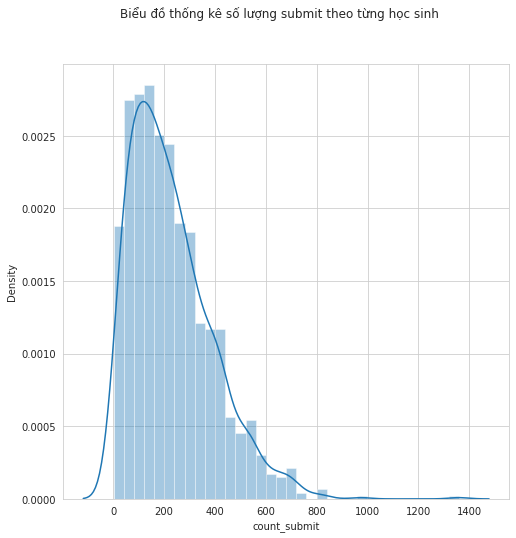

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
fig.suptitle("Biểu đồ thống kê số lượng submit theo từng học sinh")
sns.distplot(a=table['count_submit'],hist= True)
plt.show()

#Nhận xét
- Khoảng từ 40-240 submit chiếm tỷ trọng cao nhất
- Càng về sau số lượng càng giảm
- Dữ liệu phân bố phù hợp với thực tế



# Tính tổng điểm theo mỗi user_id


In [ ]:
sum_score = wecode.groupby(['user_id', "problem_id"])
sum_score = sum_score['pre_score'].max()
# Lấy điểm cao nhất của mỗi user đạt được theo từng problem

In [ ]:
sum_score

user_id  problem_id
1        81                0
         370           10000
4        3             10000
         4             10000
         5             10000
                       ...  
1868     637           10000
         638           10000
         639           10000
         640           10000
         641           10000
Name: pre_score, Length: 97190, dtype: int64

In [ ]:
lst =[]
# lấy tổng điểm các problem của mỗi user 
for i in table['user_id']:
  lst.append(sum_score.get(i).sum())

In [ ]:
lst = pd.Series(lst)
user = pd.Series(table['user_id'])

In [ ]:
s = {'user':user, 'sum_score': lst}

In [ ]:
table_sum_score = pd.DataFrame(s)
table_sum_score

,user,sum_score
0,1,10000
1,4,400000
2,5,30000
3,6,850000
4,7,9209
...,...,...
1154,1860,300221
1155,1862,40000
1156,1864,439741
1157,1865,116428


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


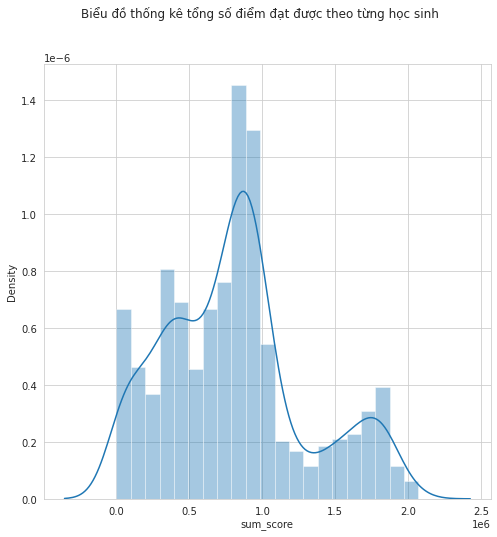

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
fig.suptitle("Biểu đồ thống kê tổng số điểm đạt được theo từng học sinh")
sns.distplot(a=table_sum_score['sum_score'],hist= True)
plt.show()

#Nhận xét
- Phần lớn tổng điểm của các problem mỗi user nằm trong khoảng từ 0.1e6 ->1e6
- Khoảng từ 0.9e6 -> 1e6 chiếm tỷ trọng cao nhất
- Dữ liệu phân bố không phù hợp so với dữ liệu submit như trên


In [ ]:
table_concat = pd.concat([table, table_sum_score['sum_score']], axis= 1)

In [ ]:
table_concat

,user_id,count_submit,sum_score
0,1,2,10000
1,4,54,400000
2,5,6,30000
3,6,130,850000
4,7,5,9209
...,...,...,...
1154,1860,76,300221
1155,1862,12,40000
1156,1864,187,439741
1157,1865,99,116428


#Score


In [ ]:
table_score

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [ ]:
table_score.isnull().any() 



id      False
QT       True
GK       True
TH       True
CK       True
TBM      True
TBTL     True
dtype: bool

In [ ]:
table_concat.isnull().any()

user_id         False
count_submit    False
sum_score       False
dtype: bool

In [ ]:
# do trong bảng có các giá trị null nên cần drop các giá trị null ra khỏi bảng
table_score = table_score.apply (pd.to_numeric, errors='coerce')
table_score = table_score.dropna(how = 'any',axis= 0)

* Nối table sau khi phân tích với table score điểm cuối kỳ thông qua user_id

In [ ]:
#Liệt kê nhưng id vừa có trong tập wecode vừa có trong tập score
lst1 = []  # danh sách id của bảng wecode
lst2 = []  # danh sách id của bảng score
lst3 = []  # danh sách id vừa có trong bảng wecode vừa có trong bảng score
for i in table_concat['user_id']:
  lst1.append(i)
for i in table_score['id']:
  lst2.append(i)
for i in lst2:
  if i in lst1:
    lst3.append(i)

In [ ]:
lst3[:10]

[24, 27, 29, 35, 37, 40, 42, 43, 49, 52]

In [ ]:
print("số lượng row của bảng score: " + str(len(table_score)))
print("số lượng row của bảng wecode: " + str(len(table_concat)))
print("số lượng row sau khi join : " + str(len(lst3)))

số lượng row của bảng score: 785
số lượng row của bảng wecode: 1159
số lượng row sau khi join : 682


In [ ]:
table_score_join = table_score[table_score.id == None]
table_wecode_join = table_concat[table_concat.user_id == None]


In [ ]:
for i in lst3:
  temp1 = table_score[table_score.id == i]
  temp2 = table_concat[table_concat.user_id == i]
  table_score_join= table_score_join.append(temp1)
  table_wecode_join = table_wecode_join.append(temp2)




In [ ]:
print(table_score_join.keys())
print(table_wecode_join.keys())

Index(['id', 'QT', 'GK', 'TH', 'CK', 'TBM', 'TBTL'], dtype='object')
Index(['user_id', 'count_submit', 'sum_score'], dtype='object')


In [ ]:
def extra_list(table):
  lst = []
  lst2 = []
  for i in table:
    try:
      lst.append(float(i))
    except:
      lst.append(0) 
  return lst


In [ ]:
user_id = pd.Series(extra_list(table_score_join['id']))
QT = pd.Series(extra_list(table_score_join['QT']))
TH = pd.Series(extra_list(table_score_join['TH']))
GK = pd.Series(extra_list(table_score_join['GK']))
CK = pd.Series(extra_list(table_score_join['CK']))
TBM = pd.Series(extra_list(table_score_join['TBM']))
TBTL = pd.Series(extra_list(table_score_join['TBTL']))
count_submit = pd.Series(extra_list(table_wecode_join['count_submit']))
sum_score = pd.Series(extra_list(table_wecode_join['sum_score']))

In [ ]:
s = {'user_id':user_id, 'count_submit':count_submit, 'sum_score': sum_score, 'QT':QT, 'GK': GK,'TH': TH,'CK': CK, 'TBM': TBM, 'TBTL': TBTL}
table_join = pd.DataFrame(s)

In [ ]:
table_join

,user_id,count_submit,sum_score,QT,GK,TH,CK,TBM,TBTL
0,24.0,164.0,760299.0,10.0,8.0,10.0,9.5,9.4,8.41
1,27.0,13.0,39000.0,10.0,10.0,10.0,10.0,10.0,8.67
2,29.0,199.0,762760.0,10.0,9.5,5.0,8.5,8.2,8.05
3,35.0,297.0,1437000.0,7.0,9.5,6.0,4.5,6.2,5.75
4,37.0,312.0,979712.0,5.5,5.5,7.5,7.5,6.9,8.27
...,...,...,...,...,...,...,...,...,...
677,1771.0,200.0,597271.0,0.0,5.0,4.0,5.5,4.4,6.40
678,1856.0,64.0,270790.0,5.0,5.5,7.0,7.5,6.7,7.34
679,1857.0,55.0,337000.0,5.0,4.5,10.0,4.0,6.0,6.03
680,1859.0,31.0,39000.0,8.0,5.0,10.0,1.5,5.4,5.06


In [ ]:
def Bieu_do_thong_ke(data):
  #tao bang chua bieu do
  fig, axes = plt.subplots(2,4, figsize = (10,10) )
  sns.set_style('whitegrid')
  fig.suptitle("Biểu đồ thống kê một số thuộc tính quan trọng")
  sns.distplot(a=data['count_submit'], ax=axes[0,0],hist= True)
  sns.distplot(a=data['sum_score'], ax=axes[0,1],hist= True)
  sns.distplot(a=data['QT'], ax=axes[0,2],hist= True)
  sns.distplot(a=data['GK'], ax=axes[1,0],hist= True)
  sns.distplot(a=data['TH'], ax=axes[1,1],hist= True)
  sns.distplot(a=data['CK'], ax=axes[1,2],hist= True)
  sns.distplot(a=data['TBM'], ax=axes[1,3],hist= True)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

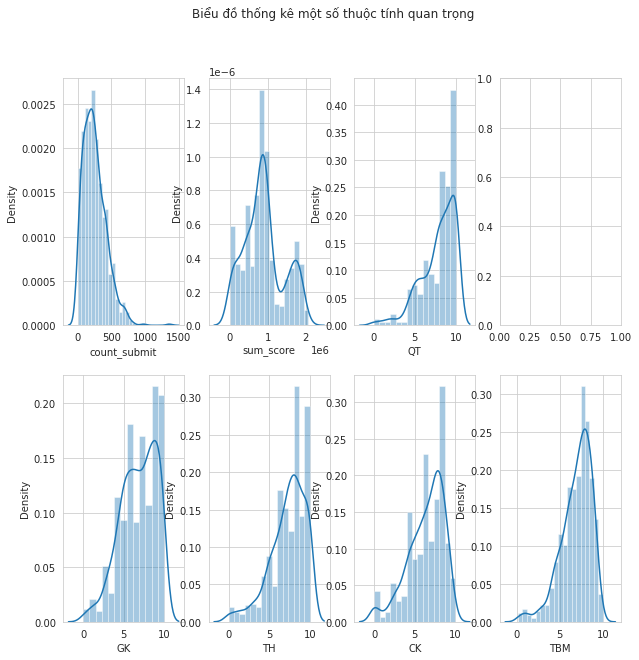

In [ ]:
Bieu_do_thong_ke(table_join)

#Nhận xét:
- Các cột điểm thành phần phân bố hơi thưa là chênh lệch do một số điểm bị drop .
- Nhìn chung mô hình thì số lượng tổng quan count_submit GK TH CK và TBM khá là tương đồng nhau
- Có thể áp dụng mô hình dự đoán điểm cuối kỳ dựa trên các cột điểm khác như count_submit, sum_score, GK, TH

